대회 링크 https://dacon.io/competitions/open/235538/overview/description

 id : 선수 고유의 아이디<br>
 name : 이름<br>
 age : 나이<br>
 continent : 선수들의 국적이 포함되어 있는 대륙입니다<br>
 contract_until : 선수의 계약기간이 언제까지인지 나타내어 줍니다<br>
 position : 선수가 선호하는 포지션입니다. ex) 공격수, 수비수 등<br>
 prefer_foot : 선수가 선호하는 발입니다. ex) 오른발<br>
 reputation : 선수가 유명한 정도입니다. ex) 높은 수치일 수록 유명한 선수<br>
 stat_overall : 선수의 현재 능력치 입니다.<br>
 stat_potential : 선수가 경험 및 노력을 통해 발전할 수 있는 정도입니다.<br>
 stat_skill_moves : 선수의 개인기 능력치 입니다.<br>
 value : FIFA가 선정한 선수의 이적 시장 가격 (단위 : 유로) 입니다<br>

In [1]:
import pandas as pd

In [2]:
train = pd.read_csv('data/FIFA_train.csv')
test = pd.read_csv('data/FIFA_test.csv')

In [102]:
submission  = pd.read_csv('data/submission.csv')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8932 entries, 0 to 8931
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                8932 non-null   int64  
 1   name              8932 non-null   object 
 2   age               8932 non-null   int64  
 3   continent         8932 non-null   object 
 4   contract_until    8932 non-null   object 
 5   position          8932 non-null   object 
 6   prefer_foot       8932 non-null   object 
 7   reputation        8932 non-null   float64
 8   stat_overall      8932 non-null   int64  
 9   stat_potential    8932 non-null   int64  
 10  stat_skill_moves  8932 non-null   float64
 11  value             8932 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 837.5+ KB


In [4]:
train.head()

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,0,L. Messi,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0
1,3,De Gea,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0
2,7,L. Suárez,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0
3,8,Sergio Ramos,32,europe,2020,DF,right,4.0,91,91,3.0,51000000.0
4,9,J. Oblak,25,europe,2021,GK,right,3.0,90,93,1.0,68000000.0


In [18]:
#한글 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

'sudo'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.
'sudo'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.
'rm'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


In [6]:
import matplotlib.pyplot as plt

In [7]:
top100 = train[:100]

In [8]:
top100.head()

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,0,L. Messi,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0
1,3,De Gea,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0
2,7,L. Suárez,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0
3,8,Sergio Ramos,32,europe,2020,DF,right,4.0,91,91,3.0,51000000.0
4,9,J. Oblak,25,europe,2021,GK,right,3.0,90,93,1.0,68000000.0


In [16]:
# contract_until별로 묶은 다음 value의 평균 값을 구함
print(top100.groupby('contract_until').mean()['value'])

contract_until
2019            2.500000e+07
2020            3.332609e+07
2021            4.809091e+07
2022            4.097368e+07
2023            4.226087e+07
2024            4.133333e+07
2026            5.050000e+07
Jun 30, 2019    5.700000e+07
Name: value, dtype: float64


In [9]:
# 계약기간과 몸값의 상관관계 확인

x = top100.groupby('contract_until').mean()['value'].index # contract_until별 평균의 값 -> index
y = top100.groupby('contract_until').mean()['value'].values # contract_until별 평균의 값 -> values

y

array([25000000.        , 33326086.95652174, 48090909.09090909,
       40973684.21052632, 42260869.56521739, 41333333.33333334,
       50500000.        , 57000000.        ])

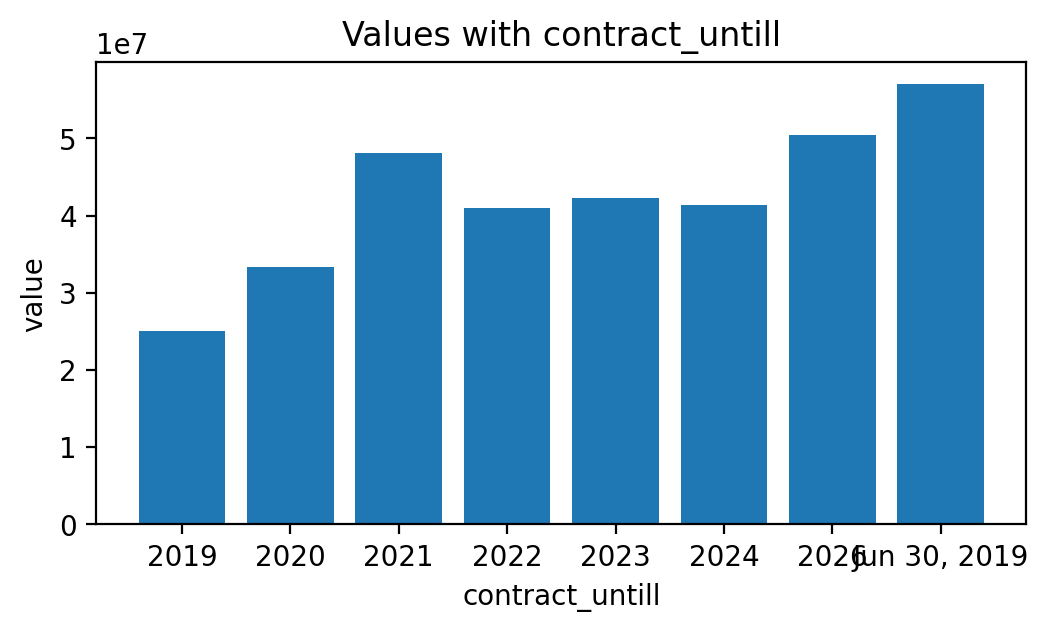

In [24]:
# 그래프

plt.figure(dpi=200, figsize=(6,3)) # 그래프 크기

plt.title('Values with contract_untill')
plt.xlabel('contract_untill')
plt.ylabel('value')

plt.bar(x,y)
plt.show()

계약 기간이 짧을 수록 몸값이 낮음

In [28]:
xposition = top100.groupby('position').mean()['value'].index
yposition = top100.groupby('position').mean()['value'].values

In [58]:
print(top100[['position', 'id']].groupby('position').count())

          id
position    
DF        23
GK        14
MF        39
ST        24


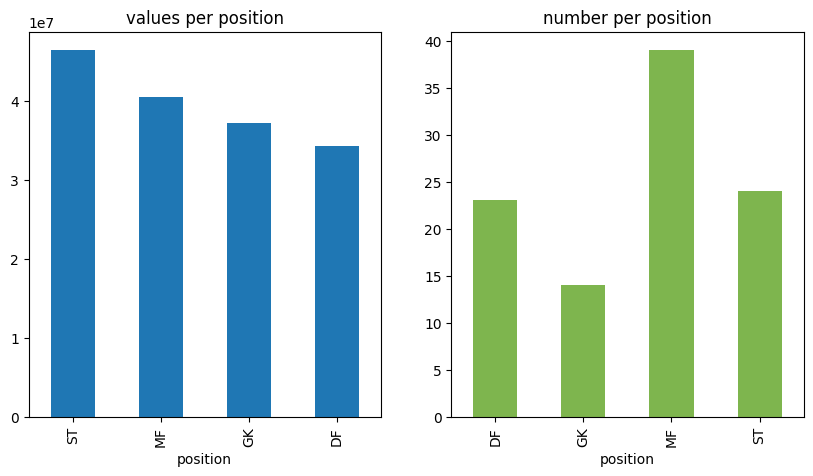

In [79]:
f, ax = plt.subplots(1,2,figsize=(10,5))
top100[['value', 'position']].groupby(['position'], as_index=True).mean().sort_values(by='value', ascending=False).plot.bar(ax=ax[0])
ax[0].set_title('values per position')

top100[['position', 'id']].groupby('position').count().plot.bar(ax=ax[1], color='#7eb54e')
ax[1].set_title('number per position')
ax[0].legend().remove()
ax[1].legend().remove()
plt.show()

공격수가 평균적으로 몸값이 높음

Text(0.5, 1.0, 'values per reputation')

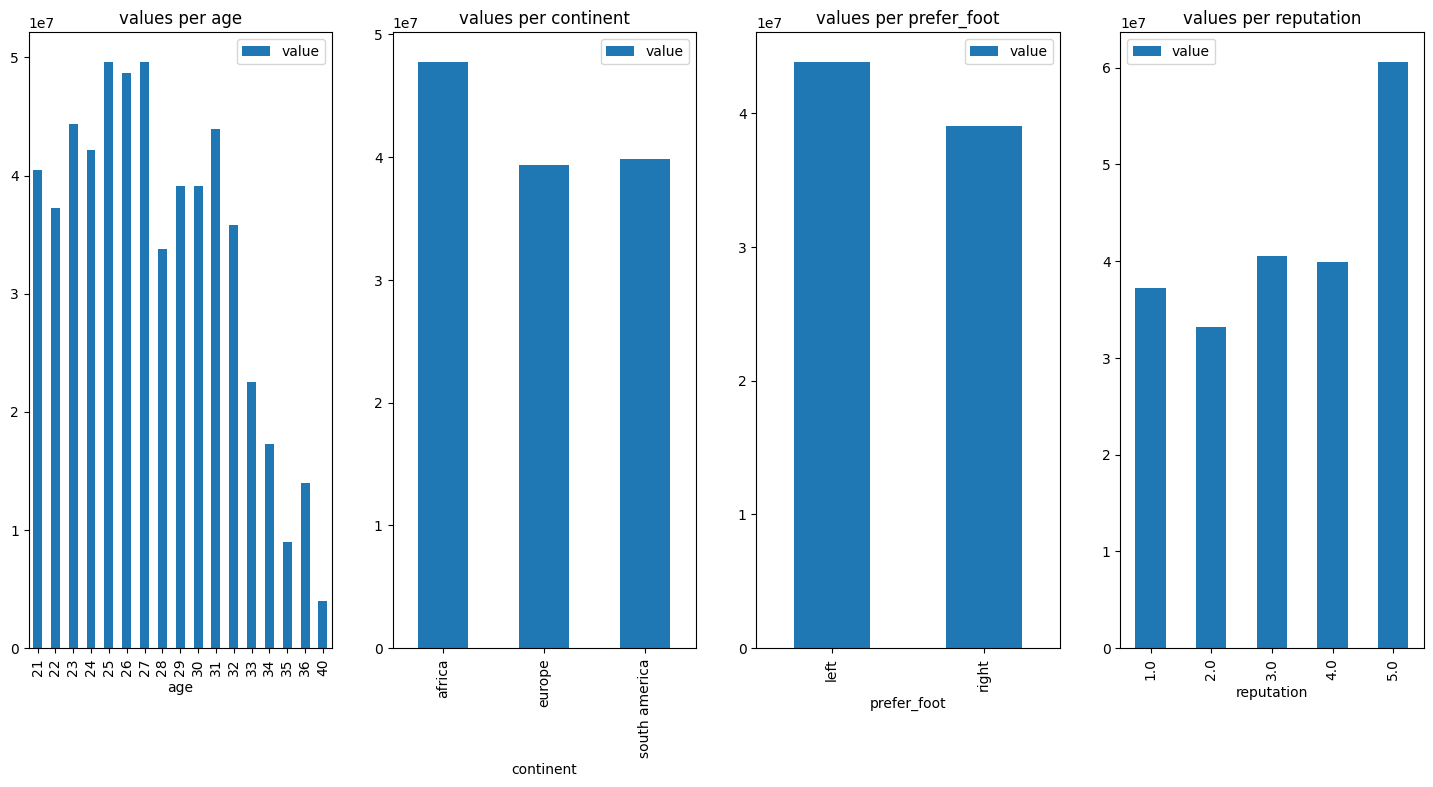

In [85]:
f, ax = plt.subplots(1,4, figsize=(18,8))
top100[['age', 'value']].groupby(['age'], as_index=True).mean().sort_values(by='age', ascending=True).plot.bar(ax=ax[0])
ax[0].set_title('values per age')
top100[['continent', 'value']].groupby(['continent'], as_index=True).mean().plot.bar(ax=ax[1])
ax[1].set_title('values per continent')
top100[['prefer_foot', 'value']].groupby(['prefer_foot'], as_index=True).mean().plot.bar(ax=ax[2])
ax[2].set_title('values per prefer_foot')
top100[['reputation', 'value']].groupby(['reputation'], as_index=True).mean().plot.bar(ax=ax[3])
ax[3].set_title('values per reputation')


- 24~26세가 평균적으로 몸값이 높다
- 아프리카 선수들이 평균적으로 몸값이 높다
- 왼발잡이 선수들이 평균적으로 몸값이 높다
- 유명도가 높을수록 평균적으로 몸값이 높다

In [90]:
train = train.drop(columns='stat_potential')
train = train.drop(columns='stat_skill_moves')
train = train.drop(columns='stat_overall')

In [92]:
test = test.drop(columns='stat_potential')
test = test.drop(columns='stat_skill_moves')
test = test.drop(columns='stat_overall')

In [93]:
train

,id,name,age,continent,contract_until,position,prefer_foot,reputation,value
0,0,L. Messi,31,south america,2021,ST,left,5.0,110500000.0
1,3,De Gea,27,europe,2020,GK,right,4.0,72000000.0
2,7,L. Suárez,31,south america,2021,ST,right,5.0,80000000.0
3,8,Sergio Ramos,32,europe,2020,DF,right,4.0,51000000.0
4,9,J. Oblak,25,europe,2021,GK,right,3.0,68000000.0
...,...,...,...,...,...,...,...,...,...
8927,16925,S. Adewusi,18,africa,2019,MF,right,1.0,60000.0
8928,16936,C. Ehlich,19,europe,2020,DF,right,1.0,40000.0
8929,16941,N. Fuentes,18,south america,2021,DF,right,1.0,50000.0
8930,16942,J. Milli,18,europe,2021,GK,right,1.0,50000.0


In [97]:
def func(string:object) -> int:
    """계약 연도만 추출하여 int로 반환"""
    string = string[-4:]
    return int(string)


train['contract_until'] = train['contract_until'].apply(func)
test['contract_until'] = test['contract_until'].apply(func)

In [98]:
train.drop(['id', 'name'], axis = 1, inplace = True)
test.drop(['id', 'name'], axis = 1, inplace = True)

In [95]:
train['continent'] = train['continent'].astype('category').cat.codes
test['continent'] = test['continent'].astype('category').cat.codes

train['position'] = train['position'].astype('category').cat.codes
test['position'] = test['position'].astype('category').cat.codes

train['prefer_foot'] = train['prefer_foot'].astype('category').cat.codes
test['prefer_foot'] = test['prefer_foot'].astype('category').cat.codes

In [99]:
from sklearn.ensemble import RandomForestRegressor

train_x = train.drop('value',axis = 1)
train_y = train['value']


model = RandomForestRegressor()
model.fit(train_x,train_y)

RandomForestRegressor()

In [100]:
pred = model.predict(test)

In [103]:
submission['value'] = pred

In [104]:
submission.to_csv('베이스라인.csv',index = False)